*Este tutorial é uma adaptação do conteúdo do webinar **[Analisando representatividade de candidaturas eleitorais](https://escoladedados.org/webinar/analisando-representatividade-de-candidaturas-eleitorais/)** realizado por Polinho Mota (data_labe). O texto e a organização deste notebook foi feito pela Escola de Dados em abril de 2024.*

 Neste notebook, veremos como utilizar a linguagem R para analisar dados de eleições. No ano em que este tutorial está sendo escrito acontecerá as eleições municipais, mas independente de qual seja o momento que você está lendo, saber o indicativo de representatividade das candidaturas é muito importante até, em muitos casos, para compreender o motivo de ausência ou presença de eficiência em algumas políticas públicas.

O tutorial foi construído de maneira que qualquer pessoa possa executar os códigos, apenas adaptando a sua cidade. No webinar, Polinho analisa os dados relacionados a cidade do Rio de Janeiro. Aqui utilizaremos dados do estado de Pernambuco.

Iremos coletar os dados, tratar, analisar e exportar. No final teremos uma base de dados totalmente personalizada que será capaz de responder algumas pergunta sobre o assunto proposto.

# Como utilizar este notebook 🧭

Eu não sei qual o seu nível de conhecimento na linhaguagem R, mas este notebook foi construído pensando em pessoas que nunca usaram ou pessoas com conhecimentos básicos. Se você já tem um conhecimento avançado, talvez ache muito monótono. E por falar em monotomia, pode haver trechos que poderiam ser feitos ou de uma maneira mais compacta ou menos explicativa, mas  é de propósito. Optamos por escrever assim para tentar deixar o mais didático possível

Bem, se você é uma pessoa iniciante, sugerimos que:


- Siga todos o conteúdo em sequência enquanto executa os scripts. Cada etapa é pensada para que você consiga compreender o processo básico de análises.

Se você é uma pessoa que já tem algum conhecimento da linguagem:

- Opcionalmente leia a seção *Introdução*, que te dará um contexto sobre a análise que você quer fazer;
- Pegue os dados na seção *links úteis*; e
- Pule para seção *Acelera*, onde estarão os mesmos scripts das etapas anteriores, porém apenas comentados.


Vamos começar?!

# Links úteis 🔗

Aqui estão todos os links que podem apoiar você neste tutorial:



* Cartilha [Dados sem caô](https://datalabe.org/cms/wp-content/uploads/2022/05/guia_dados_sem_cao.pdf)
*   Webinar: [Analisando representatividade de candidaturas eleitorais](https://escoladedados.org/webinar/analisando-representatividade-de-candidaturas-eleitorais/)
*   [Scripts](https://github.com/escola-de-dados/tutorial-eleicoes/tree/main/webinar-analisando-representatividade-eleitorais) usados no webinar
* [Bases de dados](https://github.com/escola-de-dados/tutorial-eleicoes/tree/main) usadas neste notebook
* Site da [Base dos Dados](https://basedosdados.org/) (BD)







# Introdução 📚

A análise de dados sempre vai começar respondendo uma pergunta. A pergunta é muito importante, pois é a partir dela que temos um direcionamento de quais dados vamos utilizar. No nosso caso, a pergunta é: *quantas candidatas negras foram eleitas nos municípios de Pernambuco?*. Se estamos falando de eleição, consequentemente os dados neste caso serão dados eleitorais.

Os dados eleitorais estão disponíveis no portal de dados abertos do [Tribunal Superior Eleitoral](https:/https://dadosabertos.tse.jus.br). Ter os dados disponíveis já é ótimo, nos polpa o trabalho de adquiri-los de maneira mais complexa. No entanto, mesmo embora exista esta disponibilidade, não temos como garantir se os dados estão bons o suficiente para serem analisados.

Atualmente temos iniciativas muito interessantes que tem facilitado cada vez mais os processos de análise, tentando ao máximo diminuir as etapas mais complexas (como as de limpeza, por exemplo) para tornar mais simples qualquer pessoa com conhecimentos técnicos mínimos conseguir analisar. Uma dessas iniciativas é a [Base dos Dados](https://basedosdados.org/) (BD).

Na BD, os dados já vem tratados e organizados, de maneira que você só precisa se preocupar em filtar exatamente os dados que utilizará para suas análises.

Não vamos aqui nos estender explicando como funciona a BD, mas convidamos você a conhecer e utilizar as bases organizadas por eles.

Sem mais delongas, vamos começar! o/

# Coletando os dados ⛏

Os dados da BD estão armazenados na [BigQuery](https://basedosdados.github.io/mais/access_data_bq/), um serviço de banco de dados em nuvem da Google. Para acessar, basicamente só precisa ter uma conta Gmail.

**Spoiler:** vamos utilizar R para analisar, mas para coletar os dados que precisamos, vamos utilizar SQL. Não se preocupe, vai dar tudo certo! 😁

## Primeira etapa: buscando dados na BD

Vamos começar acessando o site da BD para encontrar a base que queremos: **https://basedosdados.org/**.

Logo na tela inicial vai aparecer um campo de busca para você dizer qual base você quer visualizar. Neste campo escreva **eleições**. Seu resultado de busca deve ser semelhante a este baixo.



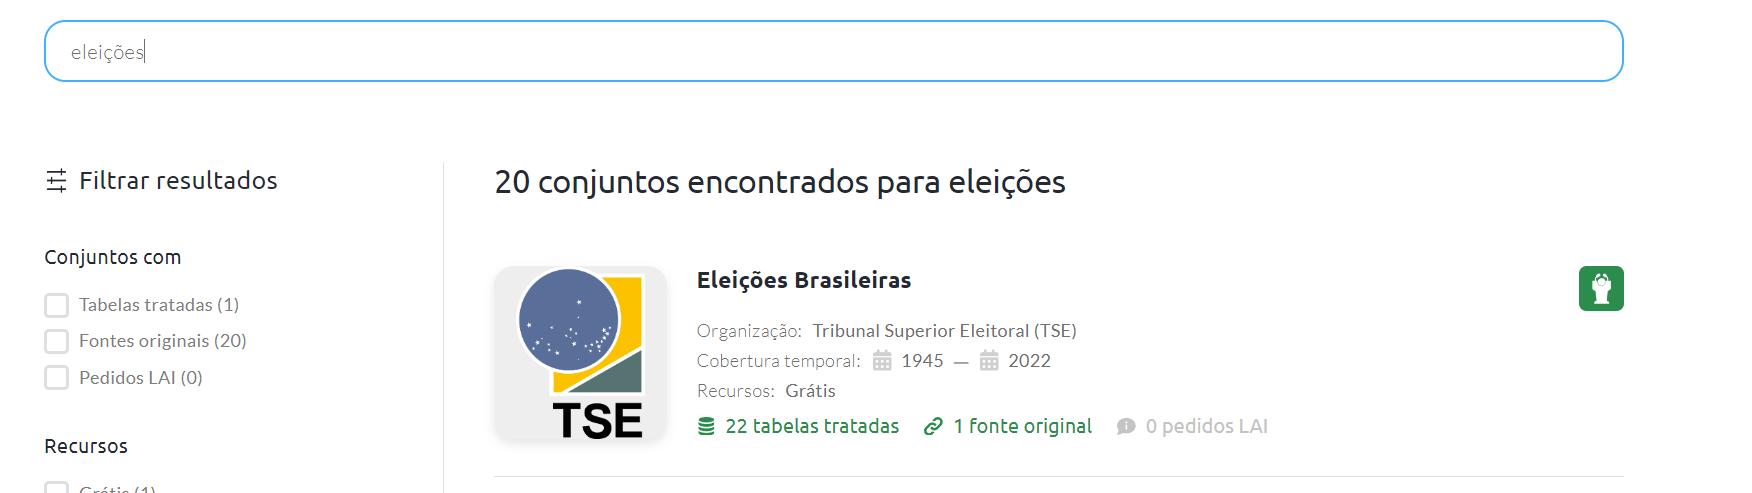

A base que queremos é exatamente **Eleições Brasileiras**, vamos clicar nela. Ao fazer isso, ele vai abrir uma nova área com informações mais detalhadas sobre a base, vamos entende-las.

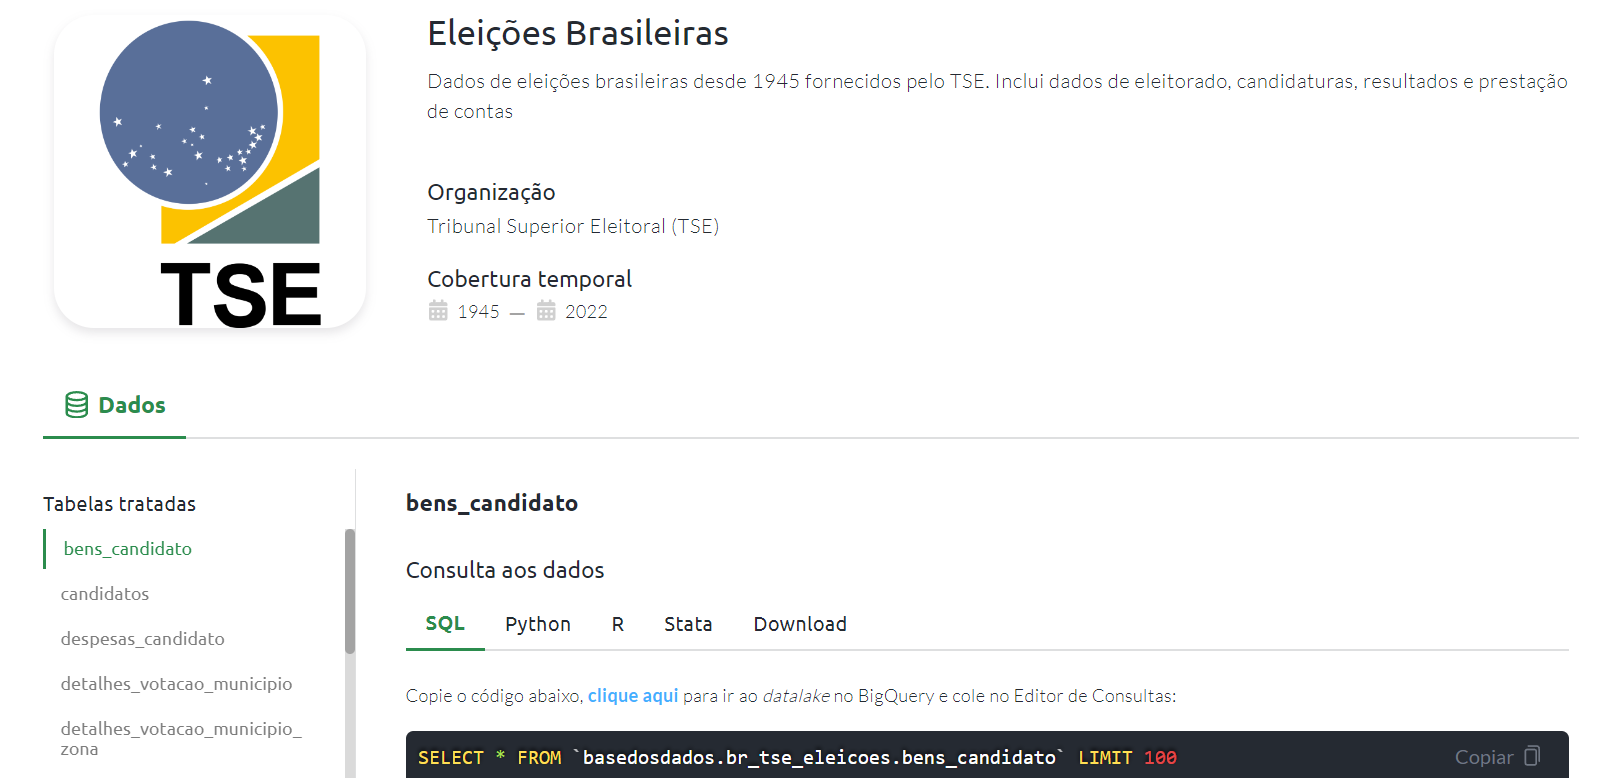

Na parte superior, abaixo do título, você encontra sobre o que se trata essa base; quem disponibiliza (*organização*) e de quais anos são os dados (*cobertura temporal*).

Na parte inferior, do lado esquerdo, mostra quais tabelas compõe essa base (tabelas tratadas); e no meio quais lingguagens você pode utilizar para coletar esses dados (*consulta aos dados*).

Bom, como você pode ver, também existe a possibilidade de *download*, mas observe uma coisa: a *cobertura temporal* mosta que temos dados que vão desde 1945 até 2022. Imagine o tamanho que deve ser essa base de dados toda. 😦

Se não vamos precisar desses dados todos, o melhor é fazermos um "recorte" do que queremos. Para facilitar nossa vida, vamos utilizar a linguagem SQL, mas você pode utilizar a que se senti mais confortável.



Olhando para as tabelas disponíveis (*Tabelas tratadas*) e pensando na nossa pergunta (*quantas candidatas negras foram eleitas nos municípios de Pernambuco?*), de cara já sabemos que vamos utilizar a tabela **candidaturas**, clique nela. Ao clicar, deve aparecer uma imagem semelhante a imagem abaixo. Vamos entender um pouco o que significa.

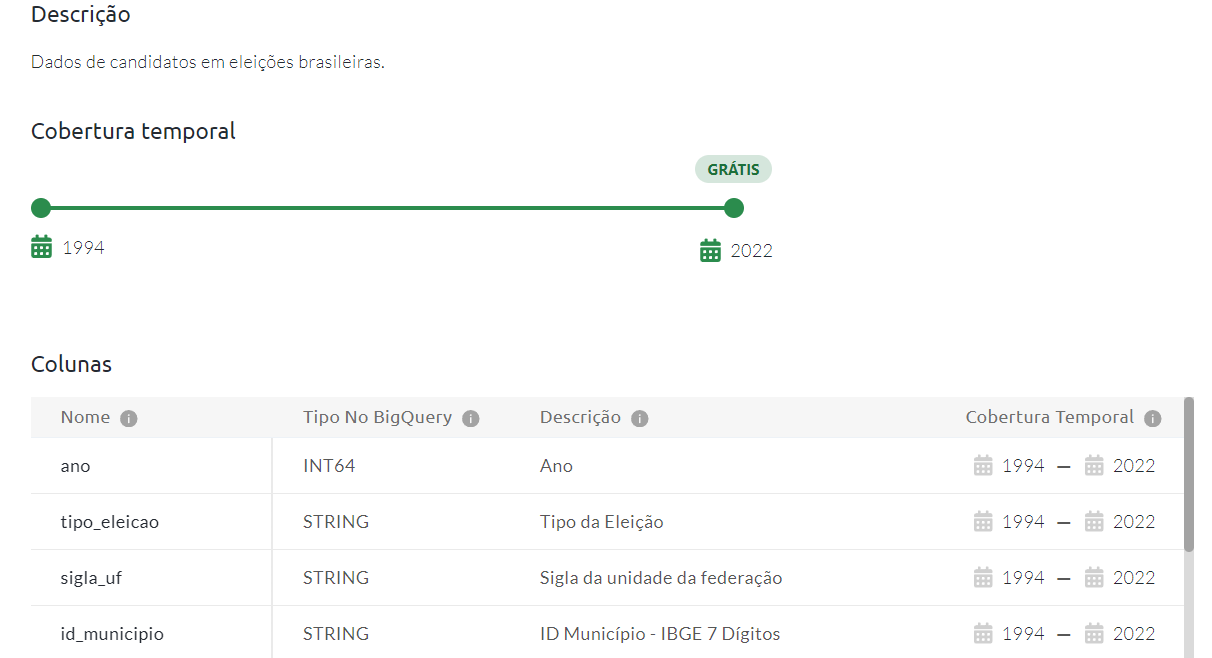

No novo conteúdo que aparece, temos informação do que é a base (*Descrição*), de que ano até que ano tem dados (*Cobertura Temporal*) e um dicionário de dados (*Colunas*).

Agora que já entendemos basicamente a página, vamos lá pegar os dados.

> **Nota:** A partir desta etapa é importante que você já esteja com a sua conta Gmail logada.

Um pouco acima da descrição, vamos ter o texto **clique aqui** com um hiperlink redirecionando para plataforma do BigQuery. Clique neste texto.

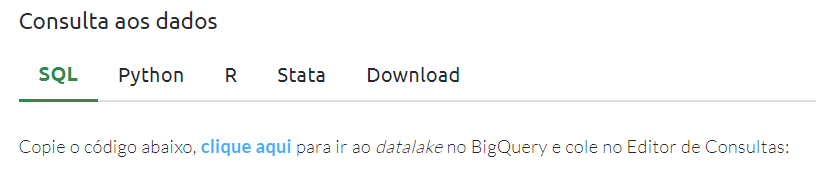

## Segunda etapa: baixando os dados relacionados a candidaturas


Redirecionando para o BigQuery, uma nova janela se abre mostrando onde de fato os dados estão armazenados. Levariamos um pouco de tempo para explicar cada parte do BigQuery,vale a pena você aprender a ferramenta depois. Neste momento,
 vamos focar no que realmente importa: coletar nossos dados. 🔨

Antes disso queremos consultar apenas as informações que nos servirão nesta análise. No centro da tela, você vai encontrar a opção **Consulta**. Ao clicar aparecerão algumas opções, clique em **Na guia dividida**.

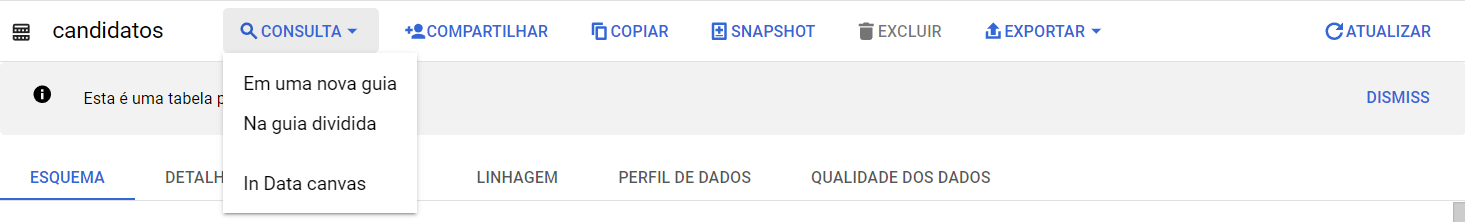

Na guia dividida que abrirá, já aparecerá a seguinte frase (cláusula) do SQL:

```SELECT  FROM 'basedosdados.br_tse_eleicoes.candidatos' LIMIT 1000```

Para responder a nossa pergunta de análise, precisamos criar uma cláusula SQL que nos traga qual a raça, gênero e municipio. Além disso, precisamos trazer nestes dados extraídos, alguma coluna (variável) que nos possibilite fazer  integração entre bases, para saber se a pessoa foi eleita ou não.

Com tudo isso em mente, vamos ver o que temos de colunas na base e o que podemos aproveitar para nossa consulta.

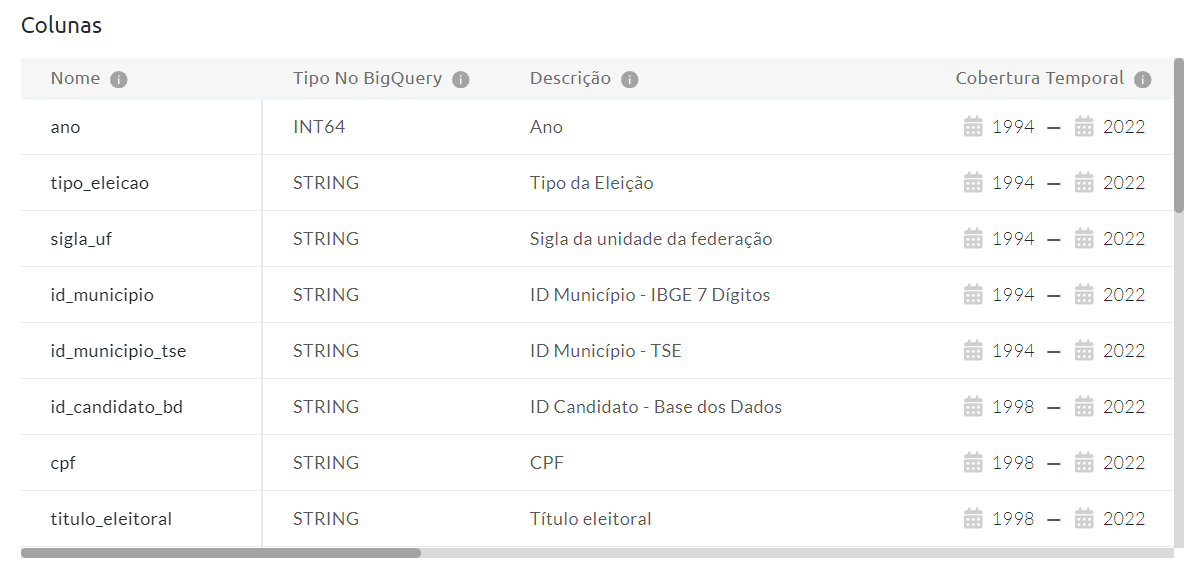

Para começar a construir nossa frase SQL, vamos clicar em **id_municipio**, **id_candidato_bd**, **genero** e **raca**. Observe que a medida que você clica em cima do nome dessas colunas, a frase que aparece na linha de consulta vai incluindo o conteúdo.

Agora, apague o ```LIMIT 1000```e inclua no lugar ```WHERE ```.

Após isso, clique em **ano** e inclua ```=2020```, clique em **sigla_uf** e escreva ```=PE``` e por último clique em **cargo** e escreva ```='vereador'```.

Sua cláusula deve ser semelhante a esta:

```
SELECT id_municipio, id_candidato_bd, genero, raca FROM `basedosdados.br_tse_eleicoes.candidatos` WHERE ano = 2020 AND sigla_uf = 'PE' AND cargo = 'vereador'
```

Agora vamos entender o que isso significa.

Traduzindo, o que esta cláusula quer dizer é o seguinte: traga o id de municipio, id de candidato, o genero e a raca (```SELECT id_municipio, id_candidato_bd, genero, raca```) que estão guardados (```FROM```) na tabela de candidatos (```basedosdados.br_tse_eleicoes.candidatos```), mas apenas os dados que sejam (```WHERE```) do ano de 2020 (```ano = 2020```), do estado de PE (```sigla_uf = 'PE'```) das pessoas vereadora (```cargo = 'vereador'```).

> **Nota:** O ```WHERE``` funciona como um filtro, então tudo que vir após ele vai refinar sua pesquisa atendendo aos critérios especificados. No nosso caso, como utilizamos o ```AND```, é necessário que os resultados obrigatoriamente respeitem as 3 indicações que informamos.

Dependendo da sua necessidade de análise, basta substituir o nome das colunas por quais quiser e utlizar os filtros que melhor te atendam.

Agora, basta clicar em **executar**. Logo abaixo vai aparecer uma pequena guia com o resultado. Clique em **Salvar resultados** e escolha a opção **CSV (arquivo local)**. Guarda este arquivo, vamos utilizar daqui a pouco.



Agora, precisamos saber se as candidaturas foram eleitas. Para isso, vamos precisar da base de resultados. Vamos voltar na página **Eleições Brasileiras** da BD e do lado esquerdo na área de **Tabelas tratadas**, vamos escolher a tabela **resultados_candidato**. O processo será o mesmo:
- clicamos para ser redirecionado para o BigQuery
- escolhemos **Consulta > Na guia dividida**

Agora vamos construir nossa cláusula. Precisaremos do **id_municipio**, **id_candidato_bd** e **resultado**. Apagamos o ```LIMIT 1000``` e incluímos o mesmo conteúdo do ```WHERE``` da consulta anterior. No final, sua cláusula deve ser semelhante a essa:

```
SELECT id_municipio, id_candidato_bd, resultado FROM `basedosdados.br_tse_eleicoes.resultados_candidato` WHERE ano = 2020 AND sigla_uf = 'PE' AND cargo = 'vereador'
```

Execute e salve os resultados, tal qual fez anteriormente.

## Terceira etapa: baixando os dados de municípios


Nos dados que baixamos, temos uma coluna que nos trás a id do municipio, mas não nos diz qual o nome. A BD utiliza o padrão de identificação que o IBGE utiliza. Logo, tanto a base do IBGE quando a da BD irá lhe servir.

Para adiantar, vou deixar aqui o [link para baixar](https://escoladedados.org/wp-content/uploads/2024/04/webinar-analisando-representatividade-eleitorais.zip).

# Tratando 🧹

Daqui em diante, tudo que vamos fazer será utilizando a linguagem R.

Para começar, precisamos carregar as bases que nós baixamos anteriormente.

> **Nota:** Antes de utilizar, renomei a base para nomes simples que façam sentido com o conteúdo dos dados. Quando se usa mais de uma base, começa a ficar complicado distinguir quem é quem.

No R, carregamos os dados utilizando o método ```read.csv()```. Dentro do parênteses, primeiro indicamos o caminho da base. Como armazenei as bases no GitHub, iremos referenciar o link de lá.

> **Nota:** Você também pode subir temporariamente as bases aqui no Collab, basta clicar no ícone de pasta no lado esquerdo e escolher o primeiro ícone abaixo do nome **Arquivo**.

Existem vários parâmetros que você pode passar para ajudar a carregar a base da melhor maneira possível. No nosso caso, estamos utilizando dois ```colClasses``` (indica que o R trate todo os dados como dados de texto), ```sep``` (indica que o arquivo csv está separado por ```;```). Consulte a [documentação](https://www.r-project.org/other-docs.html) para saber mais.

Todas as bases vão ser armazenadas dentro dos objetos que utilizaremos durante todo o script. De maneira muito simples, objetos servem para armazenar conteúdo e podem ser nomeados do jeito que quiser. Mas lembrando: tente sempre utilizar nomes que façam sentido.

Aqui construiremos 3 objetos:

- ```cand``` (armazena conteúdo sobre candidatos),

- ```elei``` (armazena conteúdo sobre eleições) e

- ```muni``` (armazena conteúdo sobre municípios).

In [2]:
#Carregando as bases de dados no Collab
cand <- read.csv("https://raw.githubusercontent.com/escola-de-dados/tutorial-eleicoes/main/candidaturas_pe.csv", colClasses = "character")
elei <- read.csv("https://raw.githubusercontent.com/escola-de-dados/tutorial-eleicoes/main/resultado.csv", colClasses = "character")
muni <- read.csv("https://raw.githubusercontent.com/escola-de-dados/tutorial-eleicoes/main/webinar-analisando-representatividade-eleitorais/codigos_municipais.csv", sep=";", colClasses = "character")

Se quiser visualizar o conteúdo de cada objeto, só passar o nome deles aqui embaixo.

In [3]:
#Substitua o nome abaixo por outro objeto. Tente você mesmo.
cand

id_municipio,id_candidato_bd,genero,raca
<chr>,<chr>,<chr>,<chr>
2607901,670675,masculino,amarela
2607901,834223,masculino,amarela
2610707,597835,masculino,amarela
2615300,1264033,masculino,amarela
2603454,513722,feminino,amarela
2603900,1677410,masculino,amarela
2603900,505625,masculino,amarela
2607208,1242812,feminino,amarela
2609600,1515407,masculino,amarela


É sempre bom entender minimamente os dados que estamos trabalhando para identificar particularidades. Na base de candidatos, existem situações como candidaturas deferidas e indeferidas, documentos que não são apresentados, etc, que podem atrapalhar de alguma forma a análise. Para mitigar esse processo, vamos utilizar um script que indique para armazenar os dados de candidatos onde todos os campos estão preenchidos.

Vamos utilizar o ```subset```, que consegue criar um subconjunto de dados com o tratamento que você indicou. No nosso caso, ele está criando um sbconjunto onde deve incluir apenas dados sem campos vazios ```id_candidato_bd!=``` e armazenando isso novamente nos objetos já indicados anteriormente.

In [4]:
#Criando um conjunto de dados sem campos vazio
cand <- subset(cand, id_candidato_bd!="")
elei <- subset(elei, id_candidato_bd!="")

A base de municípios tem muitas variáveis (colunas). Execute o script abaixo para visualizar.

In [5]:
#consultando as variáveis que tem na base dos municipios
names(muni)

[1] "UF"                                  
 [2] "Nome_UF"                             
 [3] "Região.Geográfica.Intermediária"     
 [4] "Nome.Região.Geográfica.Intermediária"
 [5] "Região.Geográfica.Imediata"          
 [6] "Nome.Região.Geográfica.Imediata"     
 [7] "Mesorregião.Geográfica"              
 [8] "Nome_Mesorregião"                    
 [9] "Microrregião.Geográfica"             
[10] "Nome_Microrregião"                   
[11] "Município"                           
[12] "Código.Município.Completo"           
[13] "Nome_Município"

As únicas variáveis que queremos para integrar a outras bases é ```Código.Município.Completo``` e ```Nome_Município```. Uma maneira simples de fazer isso, é passando para o objeto armazenar apenas a posição das variáveis que você quer.

*Certo, mas como eu sei qual é a posição da variável que eu quero?* Contando! 😉

Na minha contagem, identifiquei que os dados que preciso estão na posição 12 e 13.

> **Nota:** sempre que precisar se referir a um objeto, use colchetes ```[]``` e dentro passe o que precisa.

Após incluir o colchete no objeto, preciso incluir o primeiro conteúdo que deve ser relacionado a linhas e depois o segundo (após a virgula) relacionado a colunas.

No caso do script abaixo temos ```[,c(12,13)]```. Antes da vírgula não tem nada, então estou dizendo que quero todas as linhas. Depois da vírgula tem a localização das duas variáveis (colunas) que quero.

Em resumo estou dizendo: "*traga todas as linhas das colunas 12 e 13*".

In [6]:
#deixando só as 2 variáveis que tenho interesse (código e nome do munícipio)
muni <- muni[,c(12,13)]
names(muni)

[1] "Código.Município.Completo" "Nome_Município"

#  Integrando 🖇

Chegou a hora de criar uma base só com duas das bases que coletamos. Essa integração irá facilitar as análises que precisamos fazer para responder nossa pergunta principal.

A integração sempre acontece de duas em duas bases, utilizando o método ```merge```.

Vamos integrar primeiro a base ```cand``` com a base ```muni```. O ```merge``` identifica cada base utilizando x e y, de acordo com a ordem informada. Quem você informar primeiro será x, quem informar depois será y. Além disso, obrigatoriamente precisa ser passado alguns parâmetros. Vamos entender.

1. Primeiro você precisa dizer quais são as bases ```(cand, muni)```, representando x e y respectivamente;
2. Agora, informe a variável que essas bases tem em comum, na ordem indicada anteriormente (```by.x="id_municipio", by.y = "Código.Município.Completo"```). Observe que os parametros tem os indicadores x e y já para você entender a qual base está se referindo;
3. Informe as variáveis que você quer manter de cada base (```all.x = T, all.y = F```) onde ```T``` é ```True``` (você quer manter tudo da base ```cand```) e ```F``` é ```False``` (elimine tudo que tem na base ```muni``` que não tenha na base ```cand```);
4. Defina que não quer integrar as linhas cujos campos estejam vazios (```incomparables = NA```).

Seu script deve ser semelhante a este abaixo.

In [7]:
#dando o merge da base de candidatos com a de municípios. Está salvo no objeto cand, mas você pode utilizar outro objeto.
cand <- merge(cand, muni, by.x="id_municipio", by.y = "Código.Município.Completo",
              all.x = T, all.y = F, incomparables = NA)

Agora temos uma base personalizada do nosso jeito. Maravilha!

Vamos observar a variável raça. Usaremos o ```table``` para fazer isso.



In [8]:
table(cand$raca)


          amarela   branca indigena    parda    preta 
     115       58     6810      122    10434     2185 

O TSE utiliza a mesma nomenclatura do IBGE para esta variável. Sendo assim, a raça está classificada em 5 categorias: *branco, parda, preto, indígena e amarelo.* No entanto, no Brasil entendemos que a população negra é composta por pessoas que se identificam como parda ou preta. Queremos somar a quantidade dessas duas variáveis, e passar a chamar de ```negra```.

Para fazer essa modificação, utilizaremos o método ```which```. Esse método precisa saber qual a tabela, qual a variável e o que será substituido.

No exemplo a seguir, indicamos qual é a tabela, qual é a variável. (```cand$raca```) e o que atualmente tem lá ```=='parda'```.

>  **Nota:** A chamada da base deve ser sempre o nome da base e o nome da coluna, separado com um cifrão ```$```

Depois indicamos que queremos substituir o conteúdo atual pelo novo, no caso ```<- negra```.

Seu script deve ser semelhante a esses abaixo.

In [9]:
#transformando parda em negra
cand$raca[which(cand$raca=="parda")] <- "negra"

In [10]:
#transformando preta em negra
cand$raca[which(cand$raca=="preta")] <- "negra"

Se você olhar novamente a tabela, verá que tudo que antes era ```parda``` e  ```preta```, passa a ser ```negra```.

In [11]:
table(cand$raca)


          amarela   branca indigena    negra 
     115       58     6810      122    12619 

Só nesse script já conseguimos visualiar que temos um auto índice de candidaturas negras.

Vamos em frente!

A nossa base está composta de pessoas do gênero masculino e feminino. Para nós, só interessa saber o quantitativo de mulheres negras eleitas. Para facilitar a análise, podemos criar uma nova variável "colando" o gênero com a raça. Nesta operação vamos utilizar o ```paste```.

O ```paste``` exige saber qual o nome da nova variável que vamos armazenar os objetos (```cand$gen_raca```), o que será "colado" (```cand$genero, cand$raca```) e opcionalmente se quer colocar algo entre as duas variáveis coladas (```sep='_'```).

Seu script deve estar semelhante a este abaixo.

In [12]:
#juntando a variável gênero e raça
cand$gen_raca <- paste(cand$genero, cand$raca, sep = "_")

Veja agora como ficou.

In [13]:
table(cand$gen_raca)


         feminino_   feminino_amarela    feminino_branca  feminino_indigena 
                42                 22               2477                 36 
    feminino_negra         masculino_  masculino_amarela   masculino_branca 
              4021                 73                 36               4333 
masculino_indigena    masculino_negra 
                86               8598 

As variáveis que tem o ```_``` seguido de nenhuma informação, são as pessoas que não informaram raça.
Aqui, mais uma vez, você já consegue ter uma noção geral que as candidaturas ```masculino_negra``` são mais que o dobro das ```feminino_negra```.

Se você chegou até aqui, parabéns! 🎉

Você conseguiu fazer a limpeza nos dados. Ainda que simples, é um processo super importante.

Agora é o momento mais divertido: analisar! 🪄

#  Analisando 🔎

Os resumos que vimos no processo de limpeza nos trás uma visão do estado de PE. Nosso objetivo é saber como essas informações se comportam em cada município.

Temos todas as informações que precisamos, só basta saber como visualizar-las na tabela. Para isso, vamos utilizar novamente o ```table```.

Em um novo objeto, vamos passar no ```table``` as duas variáveis que queremos visualizar: ```cand$Nome_Município``` e ```cand$gen_raca```.

In [14]:
tnegras <- table(cand$Nome_Município, cand$gen_raca)

In [15]:
tnegras

                           
                            feminino_ feminino_amarela feminino_branca
  Abreu e Lima                      0                0              29
  Afogados da Ingazeira             0                0              14
  Afrânio                           0                0               7
  Agrestina                         0                0              11
  Água Preta                        0                0               7
  Águas Belas                       0                0              16
  Alagoinha                         0                0               2
  Aliança                           0                0              13
  Altinho                           0                0               7
  Amaraji                           0                0              11
  Angelim                           0                0               4
  Araçoiaba                         0                0               7
  Araripina                         0            

O ```table``` serve mais para uma visualização rápida de conteúdo. Se você quiser fazer manipulações diretas nas variáveis, é interessante transformar essa tabela em um *dataframe*. Podemos fazer isso usando ```as.data.frame.matrix``` e passando entre parêntese a tabela que você quer modificar.

Seu script deve estar semelhante a este abaixo.

In [16]:
tnegras <- as.data.frame.matrix(tnegras)

Se você visualizar agora, vai perceber que a ```tnegras``` agora se parece muito com as outras (```cand```, ```elei```, ```muni```).

In [17]:
View(tnegras)

,feminino_,feminino_amarela,feminino_branca,feminino_indigena,feminino_negra,masculino_,masculino_amarela,masculino_branca,masculino_indigena,masculino_negra
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Abreu e Lima,0,0,29,0,62,0,0,61,0,95
Afogados da Ingazeira,0,0,14,0,19,0,0,28,0,39
Afrânio,0,0,7,0,6,0,0,19,0,9
Agrestina,0,0,11,0,11,0,0,17,0,27
Água Preta,0,0,7,0,20,0,0,9,0,46
Águas Belas,0,0,16,0,21,0,0,13,3,66
Alagoinha,0,0,2,0,11,0,0,11,0,16
Aliança,0,0,13,0,15,0,0,24,0,28
Altinho,0,0,7,0,14,0,0,17,0,25


Perceba que cada municipio agora tem informações relacionadas a cada gênero_raça que informamos. No entanto, da maneira que está não conseguimos avançar muito, pois o nome dos municípios não são uma coluna. Vamos mudar isso!

Para transpor de linhas para colunas, vamos criar uma variável chamada município (```tnegras$municipio```), e enviar o conteúdo das linhas com o nome dos municípios (```row.names(tnegras)```).

Seu script deve estar semelhante a este abaixo.

In [18]:
#Transpondo o nome dos municípios para uma coluna
tnegras$municipio <- row.names(tnegras)

As colunas criadas sempre ficam no final.
Se você visualizar agora...

In [19]:
View(tnegras)

,feminino_,feminino_amarela,feminino_branca,feminino_indigena,feminino_negra,masculino_,masculino_amarela,masculino_branca,masculino_indigena,masculino_negra,municipio
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
Abreu e Lima,0,0,29,0,62,0,0,61,0,95,Abreu e Lima
Afogados da Ingazeira,0,0,14,0,19,0,0,28,0,39,Afogados da Ingazeira
Afrânio,0,0,7,0,6,0,0,19,0,9,Afrânio
Agrestina,0,0,11,0,11,0,0,17,0,27,Agrestina
Água Preta,0,0,7,0,20,0,0,9,0,46,Água Preta
Águas Belas,0,0,16,0,21,0,0,13,3,66,Águas Belas
Alagoinha,0,0,2,0,11,0,0,11,0,16,Alagoinha
Aliança,0,0,13,0,15,0,0,24,0,28,Aliança
Altinho,0,0,7,0,14,0,0,17,0,25,Altinho


Legal! Vamos em frente! o/

## Certo, mas e a base de eleitas? 🧐

Hahaha! Boa!

Organizamos a base de candidaturas, mas ainda precisamos saber quem dessas pessoas foram eleitas. O processo de tratamento será muito semelhante ao anterior, então aqui vou ser mais prática e apenas incluir os scripts comentados.

In [20]:
#o que temos de resultados?
table(elei$resultado)


eleito por media    eleito por qp       nao eleito         suplente 
             554             1594             4961            11621 

In [21]:
#Pra nós interessa só o que tem a ver com eleitos. Vamos deixar só eles.
elei <- subset(elei, resultado =="eleito por media" | resultado=="eleito por qp")

Certo, temos uma coisa nova, mas é bem simples. O ```|``` significa **ou**. O script está indicando a criação de um subconjunto de dados que contenha informações apenas sobre ```eleito por media``` **ou** ```eleito por qp```.

In [22]:
#fazendo merge de cand com eleit em uma nova variável chamada total
total <- merge(cand, elei, by="id_candidato_bd", all.x = F, all.y = T, incomparables = NA)

In [23]:
#criando uma tabela de eleito por municipio
elei_muni <- table(total$Nome_Município, total$gen_raca)

In [26]:
#Transformando em um dataframe
elei_muni <- as.data.frame.matrix(elei_muni)

In [27]:
#Transpondo o nome dos municípios para uma coluna de municípios
elei_muni$municipio <- row.names(elei_muni)

In [ ]:
#Visualizando o resultado
View(elei_muni)

Prontinho! Rápido, não é?!

## Exportando os dados 📥



*Certo, mas se eu quisesse fazer visualizações ou análises fora do collab com essa base que eu criei. Tem como?*

Claro que tem! Vamos exportar ela.

Para isso, basta usar o método ```write.csv```, passando como parâmetro o nome da base que você quer importar (```tnegras```), o nome que você quer dar ao arquivo (```candidatos_gen_raca_pe_2020.csv```) e indicar que não exista mais o nome das linhas (```row.names = F```).

Seu script deve estar semelhante a este abaixo.

In [29]:
write.csv(tnegras, "candidatos_gen_raca_pe_2020.csv", row.names = F)

Faremos o mesmo para a base de eleitos.

In [30]:
write.csv(elei_muni, "eleitos_gen_raca_pe_2020.csv", row.names = F)

*Socorrooo! Não deu erro, mas também não aconteceu nada. Onde meus arquivos foram parar?*

Calma! 🧘‍♀️

Clique no ícone de pasta aqui no Collab (lado esquerdo). Arquivos que são exportando no Collab aparecem aí. Passe o mouse em cima, clique nos 3 pontinhos e escolha **fazer download**. Baixe para o seu computador.

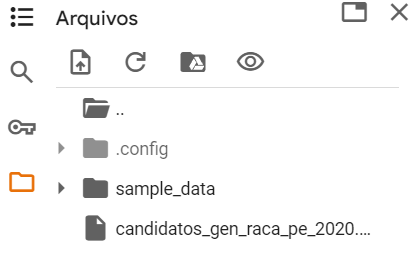

## Voltando para análise... 🕵🏾‍♀️

Agora nós temos duas bases: uma nos mostra o total de candidaturas por município (```tnegras```) e a outra nos mostra o totald e eleitas por município (```eleit_muni```). Vamos integrar uma a outra.

Queremos criar uma tabela onde tenha apenas o gênero e os municípios. Você já fez isso antes.

Seu script deve estar semelhante a este abaixo.

In [31]:
#olhando as variáveis que eu quero de fato
names(elei_muni)

[1] "feminino_"          "feminino_branca"    "feminino_indigena" 
 [4] "feminino_negra"     "masculino_"         "masculino_amarela" 
 [7] "masculino_branca"   "masculino_indigena" "masculino_negra"   
[10] "municipio"

In [32]:
#deixando apenas os municipios e o total de mulheres negras eleitas
elei_muni <- elei_muni[,c(10,4)]

E preciamos retirar o nome das linhas.

In [33]:
#tirando o nome das linhas
row.names(elei_muni) <- NULL

Faremos a mesma coisa para a tabela que criamos a partir da tabela de candidatas (```tnegras```).

In [34]:
#olhando as variáveis que eu quero de fato
names(tnegras)

[1] "feminino_"          "feminino_amarela"   "feminino_branca"   
 [4] "feminino_indigena"  "feminino_negra"     "masculino_"        
 [7] "masculino_amarela"  "masculino_branca"   "masculino_indigena"
[10] "masculino_negra"    "municipio"

In [35]:
#deixando apenas os municipios e o total de mulheres negras eleitas
tnegras <- tnegras[,c(11,5)]

In [36]:
#tirando o nome das linhas
row.names(tnegras) <- NULL

Agora que as duas bases estão bem bonitas, vamos integrar isso para criar uma base a partir da variável ```municipio```.

In [37]:
base_final <- merge(elei_muni, tnegras, by="municipio")

Para deixar mais legível, vamos mudar o nome das colunas, passando os nomes em suas respectivas ordens na base.

In [38]:
names(base_final) <- c("municipio", "eleitas_negras", "candidatas_negras")

In [39]:
names(base_final)

[1] "municipio"         "eleitas_negras"    "candidatas_negras"

Agora você tem uma base que consegue responder nossa pergunta inicial. PARABÉNS! 🎉

# Acelera 🏃🏿‍♀️

Se você começou aqui é porque já tem algum conhecimento básico da linguagem.

Como prometido, nesta sessão você vai encontrar apenas os scripts e comentários.

Vamos lá!

In [ ]:
#Carregando as bases de dados no Collab
cand <- read.csv("https://raw.githubusercontent.com/escola-de-dados/tutorial-eleicoes/main/candidaturas_pe.csv", colClasses = "character")
elei <- read.csv("https://raw.githubusercontent.com/escola-de-dados/tutorial-eleicoes/main/resultado.csv", colClasses = "character")
muni <- read.csv("https://raw.githubusercontent.com/escola-de-dados/tutorial-eleicoes/main/webinar-analisando-representatividade-eleitorais/codigos_municipais.csv", sep=";", colClasses = "character")

In [ ]:
#Criando um conjunto de dados sem campos vazio
cand <- subset(cand, id_candidato_bd!="")
elei <- subset(elei, id_candidato_bd!="")

In [ ]:
#consultando as variáveis que tem na base dos municipios
names(muni)

In [ ]:
#deixando só as 2 variáveis que tenho interesse (código e nome do munícipio)
muni <- muni[,c(12,13)]
names(muni)

In [ ]:
#dando o merge da base de candidatos com a de municípios. Está salvo no objeto cand, mas você pode utilizar outro objeto.
cand <- merge(cand, muni, by.x="id_municipio", by.y = "Código.Município.Completo",
              all.x = T, all.y = F, incomparables = NA)

In [ ]:
#transformando parda em negra
cand$raca[which(cand$raca=="parda")] <- "negra"

In [ ]:
#transformando preta em negra
cand$raca[which(cand$raca=="preta")] <- "negra"

In [ ]:
#juntando a variável gênero e raça
cand$gen_raca <- paste(cand$genero, cand$raca, sep = "_")

In [ ]:
tnegras <- table(cand$Nome_Município, cand$gen_raca)

In [ ]:
tnegras <- as.data.frame.matrix(tnegras)

In [ ]:
#transpondo o nome dos municípios para uma coluna
tnegras$municipio <- row.names(tnegras)

In [ ]:
#criando uma base só com os resultados de eleitos
elei <- subset(elei, resultado =="eleito por media" | resultado=="eleito por qp")

In [ ]:
#fazendo merge de cand com eleit em uma nova variável chamada total
total <- merge(cand, elei, by="id_candidato_bd", all.x = F, all.y = T, incomparables = NA)

In [ ]:
#criando uma tabela de eleito por municipio
elei_muni <- table(total$Nome_Município, total$gen_raca)

In [ ]:
#transformando em um dataframe
elei_muni <- as.data.frame.matrix(elei_muni)

In [ ]:
#transpondo o nome dos municípios para uma coluna de municípios
elei_muni$municipio <- row.names(elei_muni

In [ ]:
#exportando a base
write.csv(tnegras, "candidatos_gen_raca_pe_2020.csv", row.names = F)

In [ ]:
#olhando as variáveis que eu quero de fato
names(elei_muni)

In [ ]:
#deixando apenas os municipios e o total de mulheres negras eleitas
elei_muni <- elei_muni[,c(10,4)]

In [ ]:
#retirando o nome das linhas
row.names(elei_muni) <- NULL

In [ ]:
#olhando as variáveis que eu quero de fato
names(tnegras)

In [ ]:
#retirando o nome das linhas
row.names(tnegras) <- NULL

In [ ]:
#integrando para criar uma base só
base_final <- merge(elei_muni, tnegras, by="municipio")

In [ ]:
#mudando o nome das colunas para um mais amigável
names(base_final) <- c("municipio", "eleitas_negras", "candidatas_negras")

# Para ir além... 🚀

Você pode fazer mais entrevista a sua base, como por exemplo:

*Qual município teve mais candidaturas negras?*

In [40]:
#coloca os municipios em ordem decrescente a partir da coluna de eleitas
ordena_eleitas <- base_final[order(base_final$eleitas_negras, decreasing = TRUE), ]

*Qual a porcentagem de eleitas em relação as candidaturas?*

In [41]:
#coeficiente de eleicao de mulheres negras
base_final$coeficiente <- base_final$eleitas_negras/base_final$candidatas_negras

In [42]:
#para melhorar a leitura dos coeficientes
base_final$coeficiente <- base_final$coeficiente*100

In [43]:
#formada números decimais para duas casas após a vírgula
base_final$coeficiente <- round(base_final$coeficiente, 2)

In [ ]:
base_final

*Qual os 10 municípios com maior coeficiente de eleitas?*

In [ ]:
ordena_coeficiente <- base_final[order(base_final$coeficiente, decreasing = TRUE),]
ordena_10 <- head(ordena_coeficiente, 10)
ordena_10

Você pode também exporta esses dados e criar uma visualização em plataformas como online como [Flourish](https://flourish.studio/), por exemplo. Enfim, dê asas a sua imaginação!

A linguagem não se esgota aqui. Caso tenha interesse, continue seus estudos utilizando a cartilha Dados sem caô (link na seção de links úteis) e siga avançando com outros materiais.

Qualquer dúvida, manda a pergunta no nosso [fórum de jornalismo de dados](https://forum.jornalismodedados.org/).

Até a próxima! 👋